# Data Exploratory Analysis on Heart attack(Data set)

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
import plotly.offline as py
py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import pandas_profiling 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# Plot in SVG format since this format is more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [3]:
## Reading the dataset

df = pd.read_csv("Heart.csv")

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**By looking into above information** 

- we can say that there are no `NULL values`,

- There are `303 rows` and `14 columns` 

- All the varibales are the integer type and float , there are no object type  varibles


In [7]:
## Statistical Properties of the data set
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Dataset Info:

**`Heart.csv:`**

**The dataset contains 14 columns which are as follows:**

- `age` : age in years<br>

- `sex` : (1 = male; 0 = female)<br>
- `cp` : chest pain type<br>
- `trestbps` : resting blood pressure (in mm Hg on admission to the hospital)<br>
-  `chol` : serum cholesterol in mg/dl<br>
- `fbs` : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
- `restecg` : resting electrocardiographic results<br>
- `thalach` : maximum heart rate achieved<br>
- `exang` : exercise induced angina (1 = yes; 0 = no)<br>
- `oldpeak` : ST depression induced by exercise relative to rest<br>
- `slope` : the slope of the peak exercise ST segment<br>
- `ca` : number of major vessels (0-3) colored by fluoroscopy<br>
- `thal` : 3 = normal; 6 = fixed defect; 7 = reversible defect<br>
- `target` : 1 or 0<br>


### **1. How many are suffering from heart disease? Also plot the stats.**

In [9]:
pandas_profiling .ProfileReport(df)

Number of variables,14
Number of observations,303
Total Missing (%),0.0%
Total size in memory,33.3 KiB
Average record size in memory,112.4 B
Numeric,10
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,0


In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

HERE **`1`** indicates the **`YES`**, by seeing above information there are `165` members are `sufferig with heartattack,`

and **`0`** indicates the **`NO`**, by looking above information there are `138` members are `not suffering with heartattack`

**For Readability, need to variable(1 = male; 0 = female)  0 and 1 into female and male respectively, This will make easy understandable**


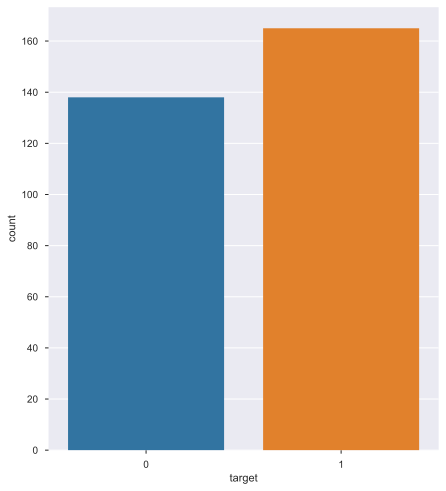

In [13]:
f,ax = plt.subplots(figsize = (7,8))
ax = sns.countplot(x = 'target',data=df)
plt.show()

In [14]:
df.groupby('target')['sex'].value_counts()

target  sex
0       1      114
        0       24
1       1       93
        0       72
Name: sex, dtype: int64

**see this, there is no so readability all zeros cannot be predictable by unknown persons**

In [15]:
import warnings
warnings.filterwarnings("ignore")

df['sex'][df['sex']==0]  = 'female'

In [16]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,female,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [17]:
df['sex'][df['sex']==1] = 'male'

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
df.groupby('sex')['target'].value_counts()

sex     target
female  1          72
        0          24
male    0         114
        1          93
Name: target, dtype: int64

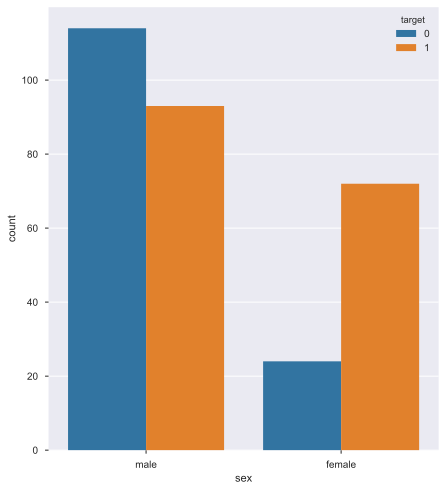

In [20]:
f,ax = plt.subplots(figsize=(7,8))
ax = sns.countplot(x='sex',hue = 'target', data = df)
plt.show()

### **2. How many males and females have heart disease out of total?**

**`Here in the target variable: 1 = yes; 0 = no`**

**Here in the above demonstration says**<br>

**Total number of female candidates** = **`96`** members<br>

**Female candidates**                 = **`72/96`** members are suffering with hearttack, and **`24/96`** members are not <br>

**Total number of Male Candidates**   = **`207`** members<br>

**Male candidates**                   = **`93/207`** members are suffering with heartattack, and **`114/207`** members are not<br>



### **3.Visualize frequency distribution of the thalach variable and find what's the heart rate and heart disease relation?**

**`thalach` : maximum heart rate**

In [89]:
df['thalach'].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

In [53]:
df['thalach'].unique() ## Unique heart rates no repetitions

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

In [54]:
df['thalach'].nunique() ## No of unique heart rates 

91

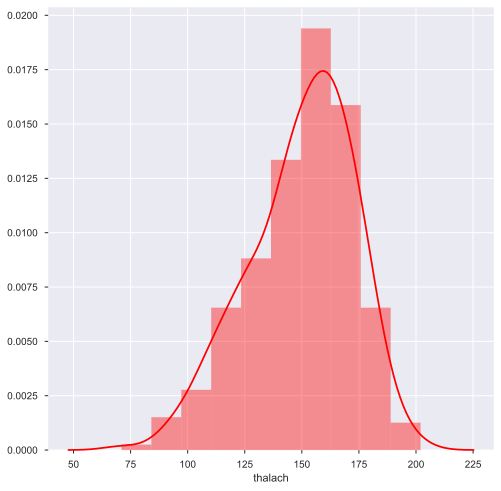

In [22]:
f,ax = plt.subplots(figsize = (8,8))
x =df['thalach']
ax = sns.distplot(x, color= 'r',bins = 10)
plt.show()

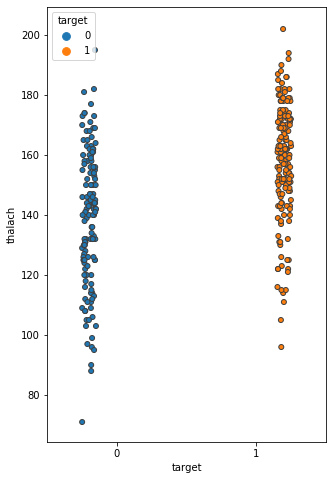

In [88]:
f, ax = plt.subplots(figsize= (5,8))
sns.stripplot(x="target",y = "thalach",hue='target',data=df,dodge = True,linewidth =1)
plt.show()

**Relation between Thalache and suffering from heart diease(target=1) is that have relatively higher heart rate (thalach)) as compared to people who are not suffering from heart diesease(target=0).**

### 4. Find correlation matrix for all the variables with target

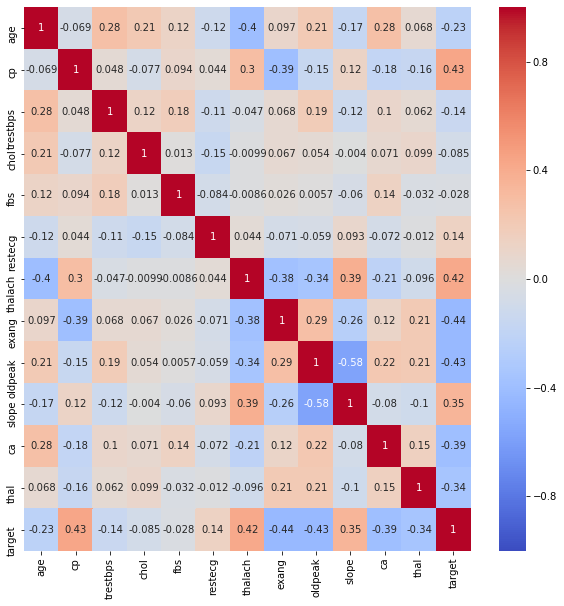

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True)

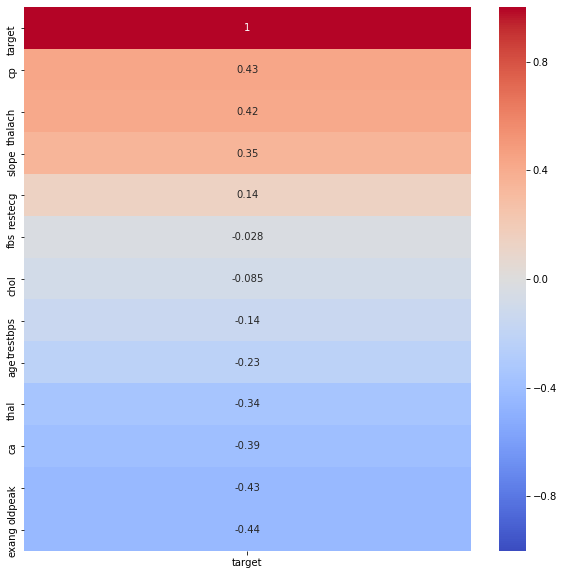

In [24]:
df_corr = df.corr()
# Correlation with target value
plt.figure(figsize=(10,10))

sns.heatmap(df_corr[['target']].sort_values(by=['target'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

### 5. Find Mean,Min & Max of age and plot its distribution.

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
Mean = df['age'].mean()
Mean

54.366336633663366

In [31]:
Min = df['age'].min()
Min

29

In [32]:
Max = df['age'].max()
Max

77

Text(0, 0.5, 'Count')

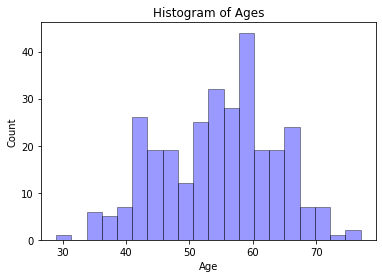

In [39]:
# Distribution Plot 

# seaborn histogram
sns.distplot(df['age'], hist=True, kde=False, 
             bins=20, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Ages')
plt.xlabel('Age')
plt.ylabel('Count')

### 6. Age and its relation to heart disease. Are young people more prone to heart disease?

In [40]:
temp_df = df[['age','target']]
temp_df.head()

,age,target
0,63,1
1,37,1
2,41,1
3,56,1
4,57,1


#### Count Number of People have heart disease having age greater than 40

In [50]:
temp_df[(temp_df.age>40) & (temp_df.target == 1)]['target'].count()

152

#### Count Number of People have heart disease having age smaller than 40

In [51]:
temp_df[(temp_df.age<=40) & (temp_df.target == 1)]['target'].count()

13

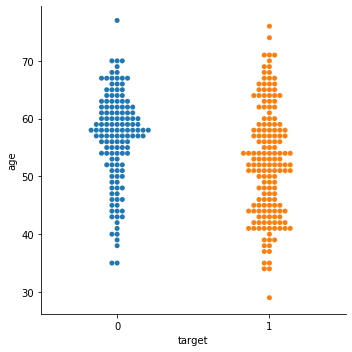

In [55]:
sns.catplot(x="target", y="age", hue="target", kind="swarm",data=temp_df)

Text(0.5, 1.0, 'age distribuition')

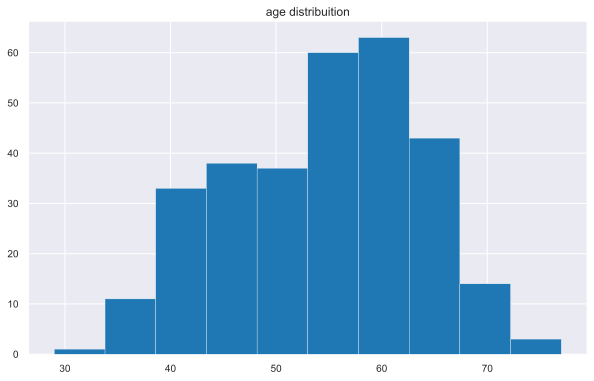

In [29]:
plt.rcParams['figure.figsize']= (10,6) # figure size
sns.set_style('darkgrid') # Style


df['age'].hist(grid=True, bins=10); 
plt.title('age distribuition')

### 7. Plot chest pain type pie chart.

Text(0.5, 0.98, 'Pie Chart for Chest Pain Type')

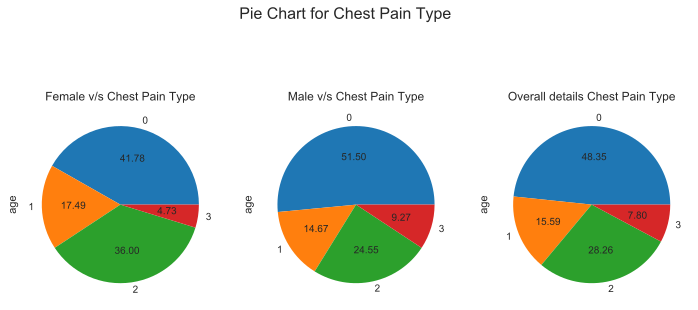

In [25]:
df_female = [rows for _, rows in df.groupby('sex')][0]
df_male= [rows for _, rows in df.groupby('sex')][1]



import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(12,10))
the_grid = GridSpec(2, 3)
plt.subplot(the_grid[0, 0], aspect=1, title='Female v/s Chest Pain Type')
df_female.age.groupby(df_female.cp).sum().plot(kind='pie',autopct='%.2f')

plt.subplot(the_grid[0, 1], aspect=1, title='Male v/s Chest Pain Type')
df_male.age.groupby(df_male.cp).sum().plot(kind='pie',autopct='%.2f')

plt.subplot(the_grid[0, 2], aspect=1, title='Overall details Chest Pain Type')
df.age.groupby(df.cp).sum().plot(kind='pie',autopct='%.2f')

plt.suptitle('Pie Chart for Chest Pain Type', fontsize=16)

### 8. What is the max heart rate achieved in non heart disease patients?

In [66]:
non_df = df[df.target == 0]
non_df['thalach'].max()

195

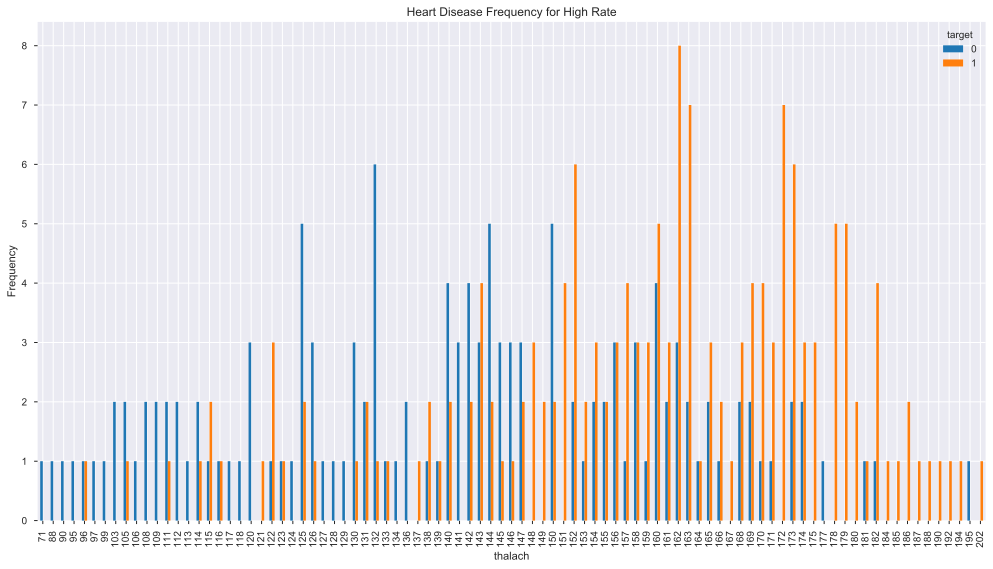

In [27]:
pd.crosstab(df.thalach,df.target).plot(kind="bar",figsize=(17,9))
plt.title('Heart Disease Frequency for High Rate')
plt.xlabel('thalach')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndthal.png')
plt.show()